In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from textblob import TextBlob
from scipy.stats import spearmanr
import statsmodels.api as sm


In [3]:
file = 'data/amazon.csv'
df = pd.read_csv(file)

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
df.describe(include='all')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [6]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
df.drop(columns=['img_link','product_link'],inplace=True)

In [10]:
df['rating_count'].fillna('0',inplace=True)
df['rating'].fillna('0',inplace=True)

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_61790/829373382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_count'].fillna('0',inplace=True)
/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_61790/829373382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [11]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
dtype: int64

In [12]:
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype(float)
df['rating_count'] = df['rating_count'].str.replace(',','').astype(int)
df['rating'] = df['rating'].str.replace('|','')
df['rating'] = pd.to_numeric(df['rating'])


In [13]:
df['category'][1]

'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'

In [14]:
df_c  = df['category'].str.split('|',expand=True)
df_c.columns = [f'Level_{col + 1}' for col in df_c.columns]
df = df.join(df_c)

In [15]:
df.drop(columns=[f'Level_{i+1}' for i in range(3,7)],inplace=True)
df.drop(columns='category',inplace=True)

In [16]:
df['Level_3'].fillna('unspecified',inplace=True)

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_61790/428655137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Level_3'].fillna('unspecified',inplace=True)


In [17]:
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,Level_1,Level_2,Level_3
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43%,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59%,4.0,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25%,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pis

In [18]:
df_explode = df.explode('user_id')

In [19]:
df_explode

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,Level_1,Level_2,Level_3
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43%,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59%,4.0,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25%,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pis

In [20]:
dunique_user_id = df['user_id'].nunique()
total_users = len(df['user_id'])
print(f'Unique User ID: {dunique_user_id}, Total users: {total_users}')

Unique User ID: 1194, Total users: 1465


In [21]:
duplicated_user_id  = df['user_id'].duplicated(keep=False)
print(duplicated_user_id)

0        True
1        True
2        True
3        True
4        True
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Name: user_id, Length: 1465, dtype: bool


In [22]:
df = df.drop_duplicates(subset=['user_id'], keep='first')

In [23]:
# To make sure that each user ID and user name is treated individually, which is often necessary for accurate analysis.


df = df.assign(user_id = df['user_id'].str.split(',').explode('user_id'))
df = df.assign(user_name = df['user_name'].str.split(',').explode('user_name'))
df = df.assign(review_id = df['review_id'].str.split(',').explode('review_id'))


In [24]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype(float)
df['discount_percentage'] = df['discount_percentage'] / 100

In [25]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,Level_1,Level_2,Level_3
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...",AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta,R2AJM3LFTLZHFO,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep,R6AQJGUP6P86,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed,R1KD19VHEDV0OR,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh,R3C02RMYQMK6FC,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories


Highest sold category in Level_1: Home&Kitchen with a count of 448
Highest sold category in Level_2: Kitchen&HomeAppliances with a count of 308
Highest sold category in Level_3: SmallKitchenAppliances with a count of 181


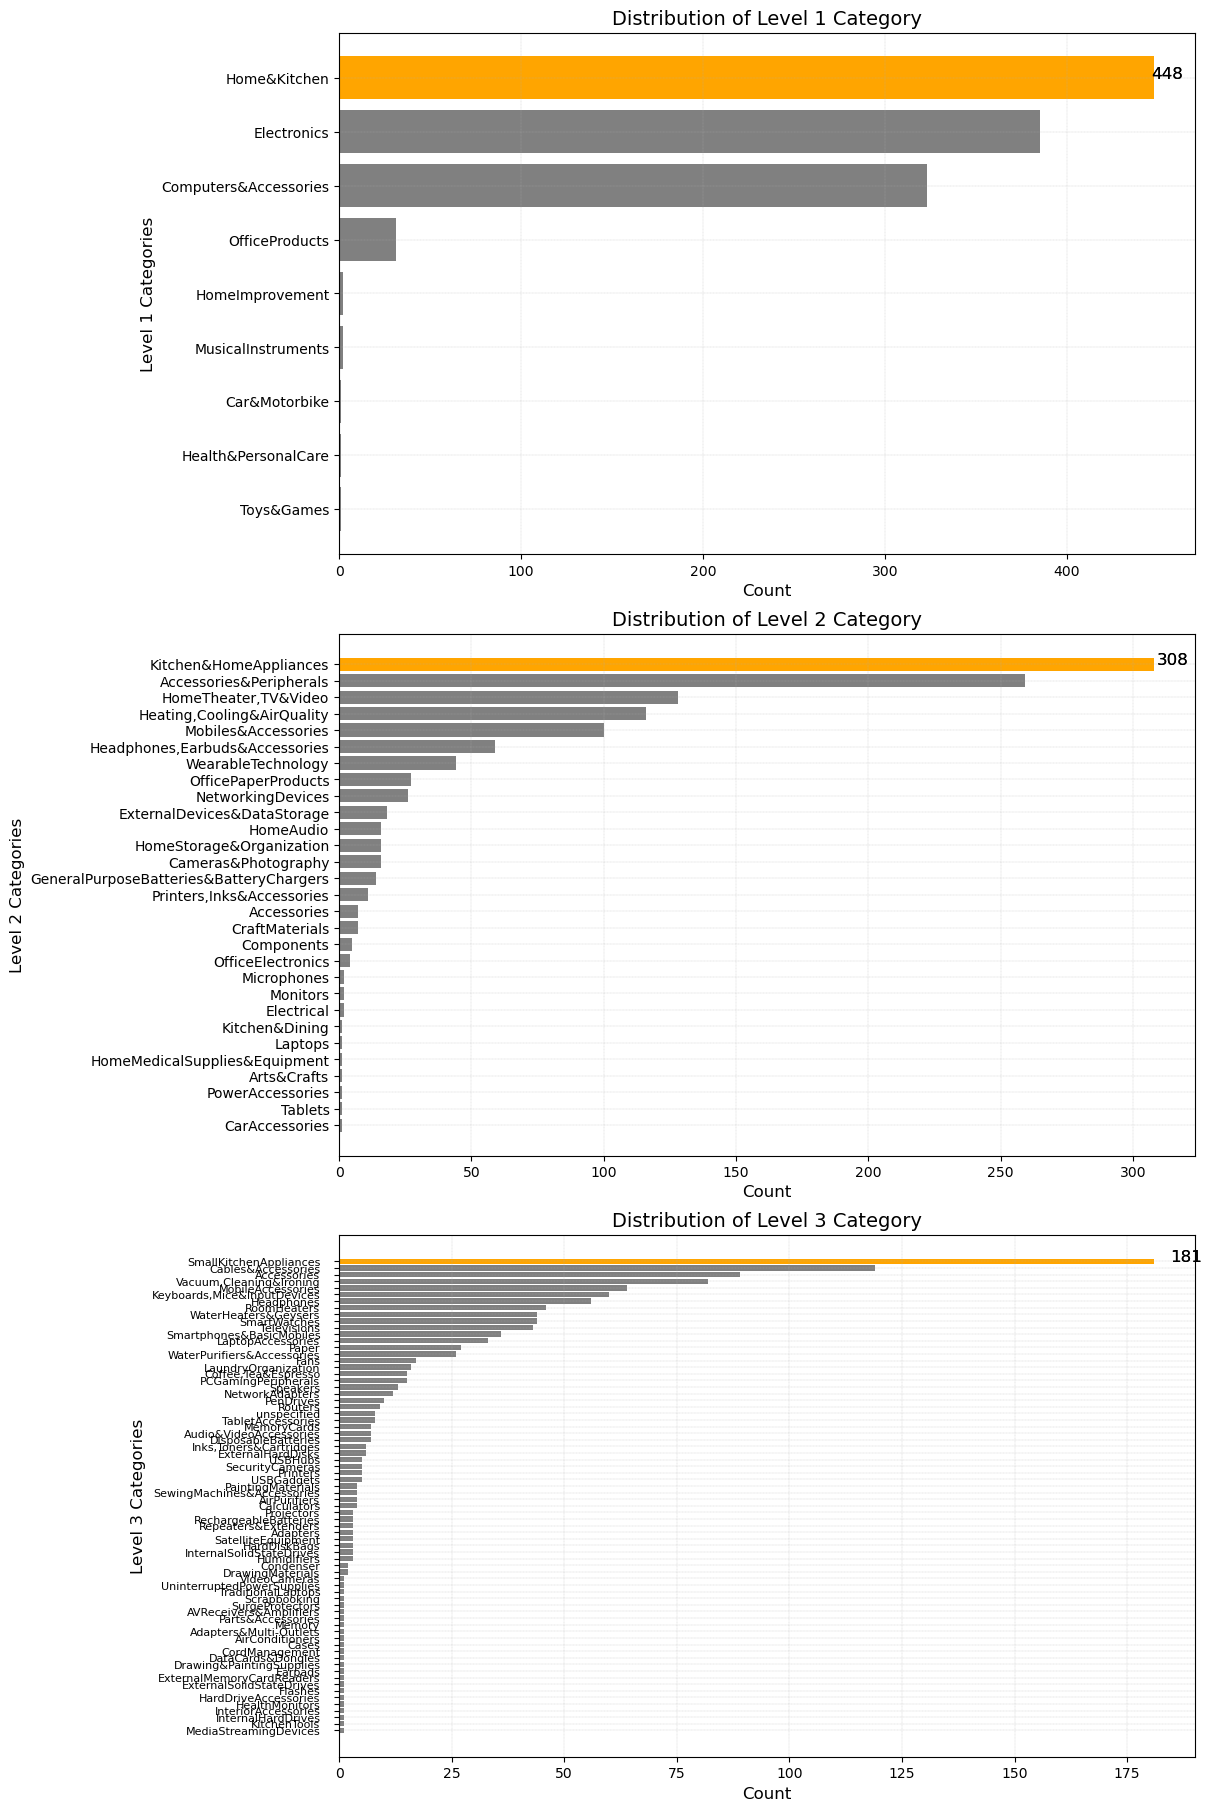

In [26]:
categories = ['Level_1', 'Level_2', 'Level_3']

# Create a figure with subplots
fig, axes = plt.subplots(3,1, figsize=(12, 18), constrained_layout=True)

for i, cat in enumerate(categories):
    # Grouping and sorting the data
    top_selling_products = df.groupby(cat)['product_id'].count().sort_values(ascending=False)
    highest_sold_category = top_selling_products.idxmax()
    highest_sold_count = top_selling_products.max()
    print(f'Highest sold category in {cat}: {highest_sold_category} with a count of {highest_sold_count}')


    # Plotting in the appropriate subplot
    colors = ['grey' if category != highest_sold_category else 'orange' for category in top_selling_products.index]
    axes[i].barh(top_selling_products.index, top_selling_products.values, color=colors)
    axes[i].set_title(f'Distribution of {cat.replace("_"," ")} Category', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel(f'{cat.replace("_"," ")} Categories', fontsize=12)
    axes[i].invert_yaxis()  # To have the highest category at the top
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.2)

    # Annotate the highest sold category
    axes[i].text(highest_sold_count + 7, top_selling_products.index.get_loc(highest_sold_category), 
                 f'{highest_sold_count}', color='black', ha='center', fontsize=12)
    if cat == 'Level_3':
        axes[i].yaxis.set_tick_params(labelsize=8, pad=10)

    # Annotate the highest sold category
    axes[i].text(highest_sold_count + 7, top_selling_products.index.get_loc(highest_sold_category), 
                 f'{highest_sold_count}', color='black', ha='center', fontsize=12)

plt.show()


1. Level 1 Category Distribution:

	•	Dominant Categories:
	•	Home & Kitchen is the most represented category, with 448 products. This suggests that Home & Kitchen is a major focus area, likely reflecting high demand or a wide variety of products in this space.
	•	Electronics and Computers & Accessories are also heavily represented, indicating these are significant categories within the dataset.
	•	Less Represented Categories:
	•	Categories like Toys & Games, Car & Motorbike, and Health & Personal Care have significantly fewer products, indicating these may be niche areas or secondary focuses.

2. Level 2 Category Distribution:

	•	Top Subcategories:
	•	Kitchen & Home Appliances and Accessories & Peripherals dominate at this level, which aligns with the focus on Home & Kitchen and Computers & Accessories from Level 1.
	•	Home Theater, TV & Video, and Heating, Cooling & Air Quality are also significant subcategories, reflecting specific product focuses within the broader categories.
	•	Diverse Representation:
	•	There is a wide variety of subcategories, which suggests that within the main categories, there is a broad range of products catering to specific needs (e.g., Wearable Technology, Mobiles & Accessories).

3. Level 3 Category Distribution:

	•	Highly Specific Product Types:
	•	Small Kitchen Appliances and Smartphones & Accessories are the most represented Level 3 categories, indicating a deep focus on these specific product types.
	•	The distribution at this level shows a sharp drop-off after the top categories, with many subcategories having a small number of products, which might reflect niche markets or highly specialized products.

Business Implications:

	1.	Product Strategy:
	•	Focus on High-Volume Categories: The heavy focus on Home & Kitchen, Electronics, and Computers & Accessories suggests these categories are key to the business. Further investment in these areas could drive growth, especially if these categories align with customer demand.
	•	Explore Opportunities in Underrepresented Categories: Categories like Toys & Games or Car & Motorbike could be potential growth areas if market demand justifies further investment.
	2.	Inventory Management:
	•	Diverse Product Range: The broad range of subcategories indicates the need for efficient inventory management to ensure that a wide variety of products are available without overstocking niche items.
	•	Potential for Cross-Selling: The diversity of products at Level 2 and Level 3 suggests opportunities for cross-selling related products within high-demand categories.
	3.	Marketing and Promotions:
	•	Targeted Campaigns: Marketing campaigns could be tailored to highlight top-performing subcategories, such as Kitchen & Home Appliances, which might appeal to a wide audience.
	•	Boost Visibility for Niche Products: Consider marketing strategies that increase visibility for lesser-known or niche products, potentially driving sales in these areas.

Step 2 Analysis

1. How Does Discount Percentage Impact Sales

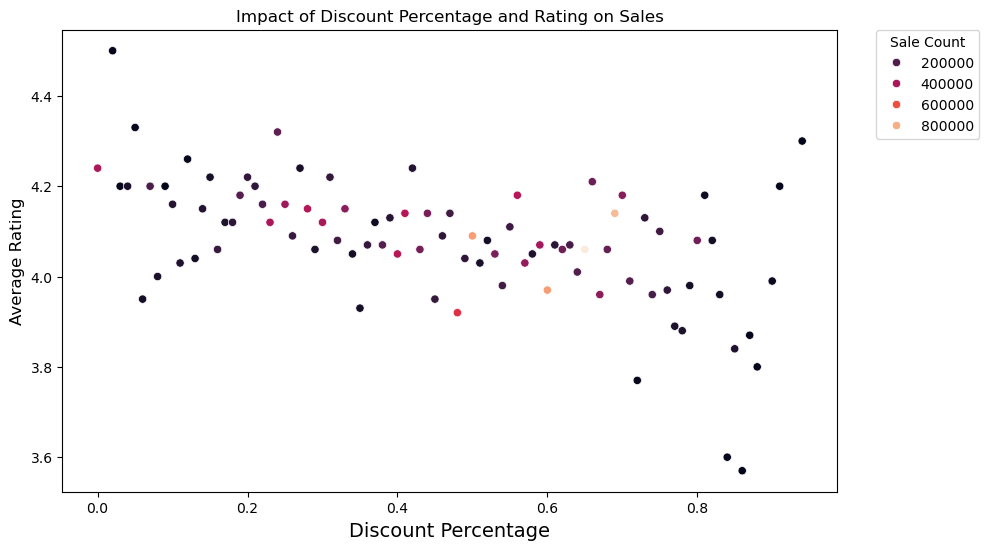

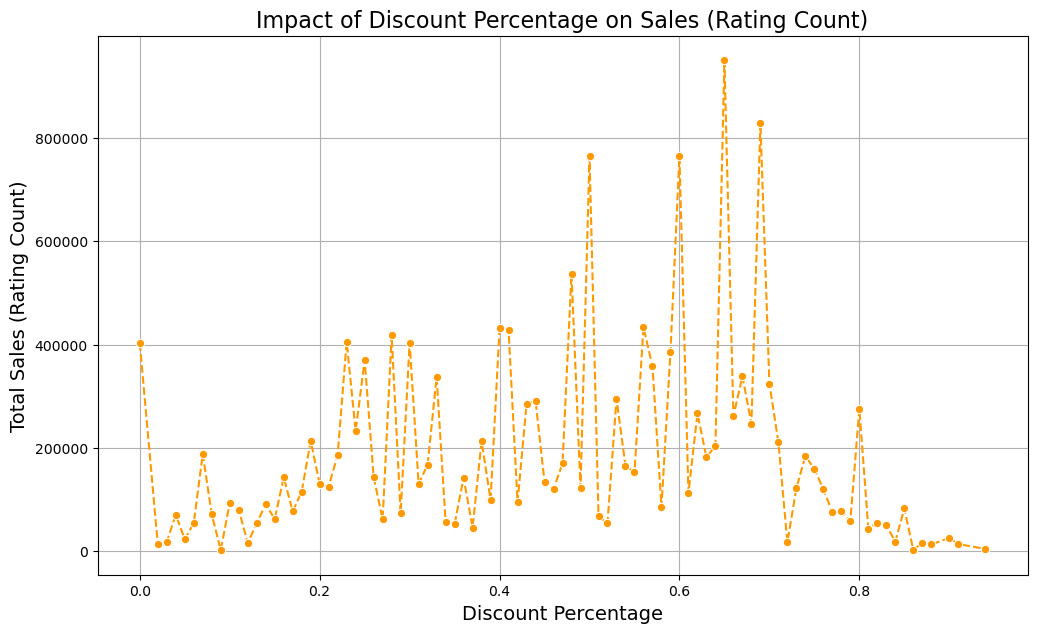

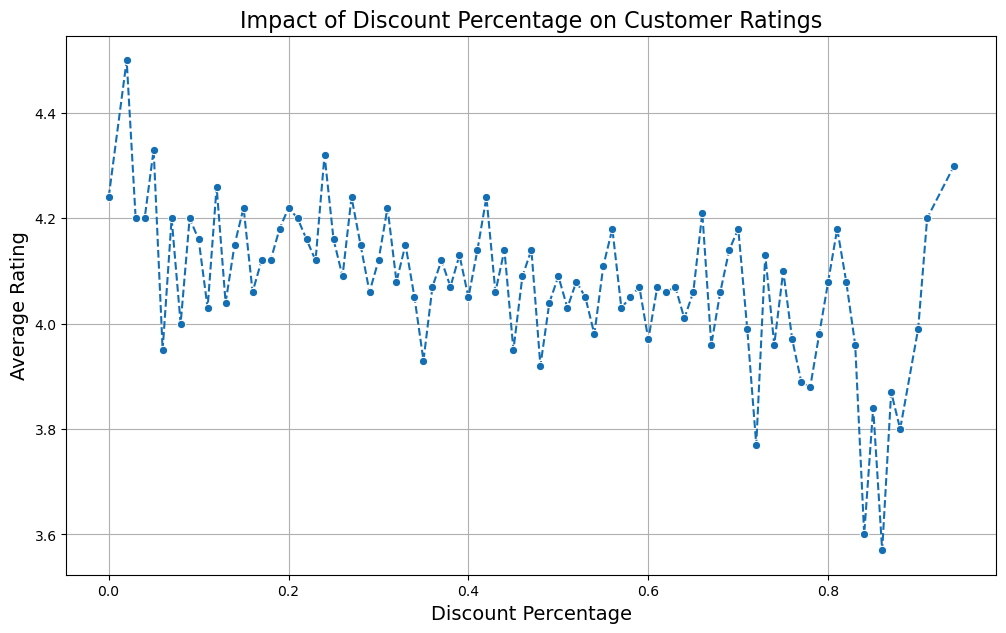

In [27]:
amazon_orange = '#FF9900'
amazon_blue = '#146EB4'
amazon_grey = '#555555'
amazon_light_grey = '#F0F0F0'

discount_impact = df.groupby('discount_percentage').agg({
    'rating' : 'mean',
    'rating_count' : 'sum'
}).round(2).reset_index()
discount_impact

#Impact of Discount Percentage and Rating on Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x=discount_impact['discount_percentage'],y=discount_impact['rating'],hue=discount_impact['rating_count'],palette='rocket')
plt.title('Impact of Discount Percentage and Rating on Sales', fontsize=12)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title ='Sale Count',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#sales against discount percentage
plt.figure(figsize=(12,7))
sns.lineplot(x=discount_impact['discount_percentage'],y=discount_impact['rating_count'],color=amazon_orange,linestyle='--',marker='o')
plt.title('Impact of Discount Percentage on Sales (Rating Count)', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Total Sales (Rating Count)', fontsize=14)
plt.grid(True)
plt.show()

#ratings against discount percentage
plt.figure(figsize=(12,7))
sns.lineplot(x=discount_impact['discount_percentage'],y=discount_impact['rating'],color=amazon_blue,linestyle='--',marker='o')
plt.title('Impact of Discount Percentage on Customer Ratings', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.show()


1. Impact of Discount Percentage on Average Ratings (Scatter Plot)

	•	General Trend:
	•	There is a slight negative correlation between discount percentage and average ratings. As the discount percentage increases, the average rating tends to decrease slightly, though the relationship is not very strong.
	•	Ratings fluctuate around 4.0 to 4.2 across various discount levels, but as discounts approach higher levels (above 60%), ratings tend to drop below 4.0 more frequently.
	•	Possible Interpretation:
	•	Perceived Value: Customers might perceive heavily discounted products as lower quality, leading to slightly lower ratings. This perception could be due to the expectation that premium products are less likely to be deeply discounted.
	•	Attracting Price-Sensitive Buyers: Higher discounts might attract more price-sensitive customers who may have higher expectations, leading to more critical reviews.
	•	Business Implication:
	•	Balancing Discounts and Quality Perception: While offering discounts can boost sales, it’s essential to maintain a balance so that the perceived quality of products isn’t compromised, which can lead to lower customer satisfaction.

2. Impact of Discount Percentage on Sales (Rating Count)

	•	Sales Volume Trend:
	•	Sales (as indicated by rating count) show a significant increase as discount percentage increases, peaking around the 40-60% discount range. Beyond this range, sales start to decline, especially as discounts approach 80-90%.
	•	The highest peaks in sales are observed around the 40% and 60% discount levels.
	•	Possible Interpretation:
	•	Optimal Discount Range: There seems to be an optimal discount range where sales are maximized, specifically between 40% and 60%. This could indicate that this discount range is most appealing to consumers, driving higher sales volumes.
	•	Diminishing Returns: Beyond a certain discount threshold, the appeal may decrease, or the market might be saturated, leading to a drop in sales despite higher discounts.
	•	Business Implication:
	•	Strategic Discounting: Focus on offering discounts in the 40-60% range to maximize sales volume. Discounts higher than this may not yield proportional increases in sales and might affect profitability negatively.

3. Combined Impact of Discount Percentage and Ratings on Sales (Bubble Plot)

	•	Visualization:
	•	The bubble plot combines the discount percentage with both sales volume (bubble size) and average rating (y-axis), providing a comprehensive view of how these factors interact.
	•	Larger bubbles are concentrated around the 40-60% discount range, indicating that this range not only maximizes sales but also maintains relatively good ratings.
	•	Possible Interpretation:
	•	Sweet Spot: The intersection of moderate discounts and maintaining good ratings occurs in the 40-60% discount range, reinforcing the idea that this range is optimal for both sales and customer satisfaction.
	•	Lower Ratings with Higher Discounts: As discounts increase beyond this range, both the size of the bubbles (sales) and the height on the y-axis (ratings) tend to decrease, suggesting diminishing returns on both fronts.
	•	Business Implication:
	•	Targeted Discount Strategies: Utilize the 40-60% discount range as a standard strategy to maximize both sales volume and maintain product ratings. This approach ensures a balance between appealing to price-sensitive customers and maintaining a positive product image.

Overall Insights and Recommendations:

	•	Optimal Discounting Strategy: Focus on offering discounts in the 40-60% range, where sales volume is maximized and ratings remain relatively high. Avoid excessive discounts unless necessary, as they may lead to diminishing returns in both sales and customer satisfaction.
	•	Perception Management: Be cautious with high discounts as they might lower perceived value, which can impact customer ratings. Consider pairing discounts with marketing that emphasizes quality to counteract any negative perceptions.
	•	Further Analysis: It could be valuable to explore how these trends vary across different product categories to see if the optimal discount range differs depending on the type of product.

2. What Features of Product Descriptions Correlate with Higher Sales and Ratings?

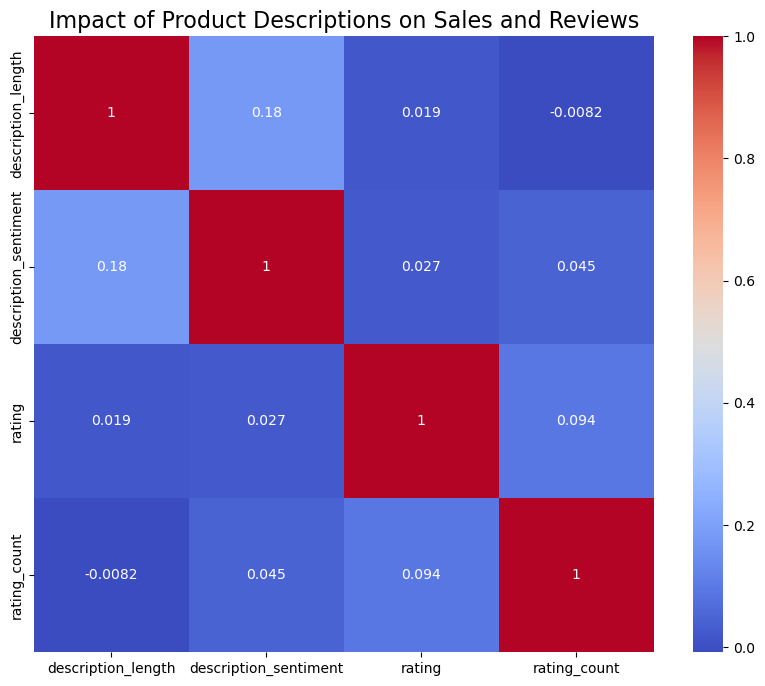

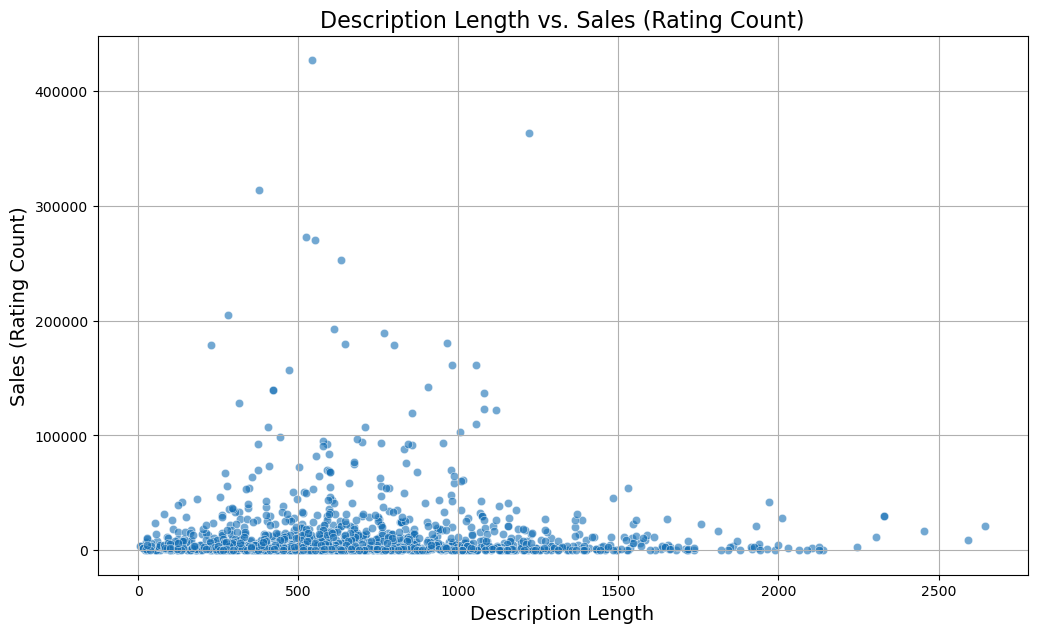

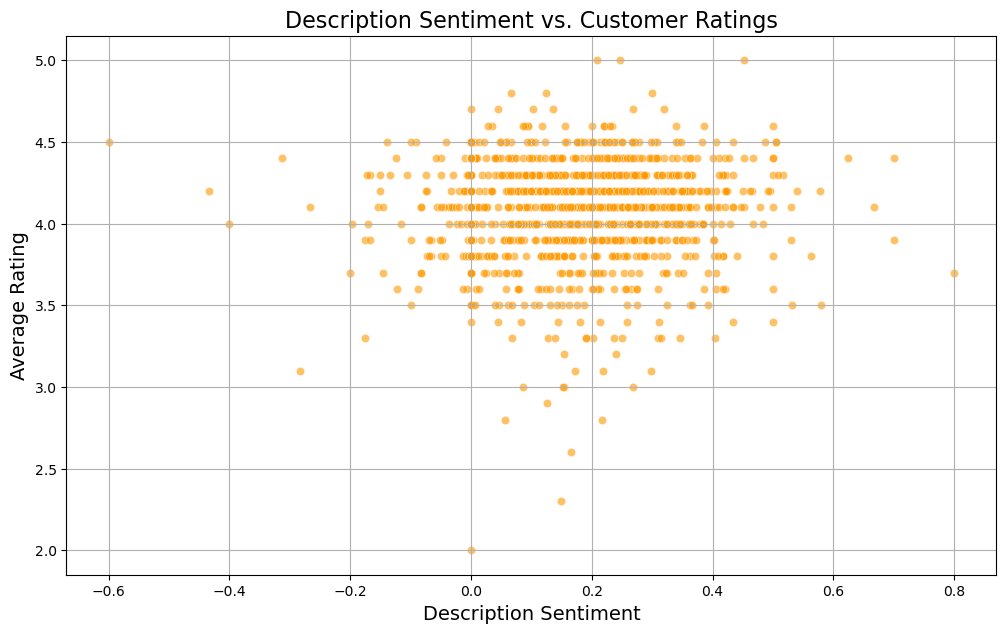

In [28]:
df['description_length'] = df['about_product'].apply(len)
df['description_sentiment'] = df['about_product'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Correlation analysis
correlation_matrix = df[['description_length', 'description_sentiment', 'rating', 'rating_count']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Impact of Product Descriptions on Sales and Reviews', fontsize=16)
plt.show()

# Scatter plot for description length vs. rating count
plt.figure(figsize=(12, 7))
sns.scatterplot(x='description_length', y='rating_count', data=df, color=amazon_blue, alpha=0.6)
plt.title('Description Length vs. Sales (Rating Count)', fontsize=16)
plt.xlabel('Description Length', fontsize=14)
plt.ylabel('Sales (Rating Count)', fontsize=14)
plt.grid(True)
plt.show()

# Scatter plot for description sentiment vs. rating
plt.figure(figsize=(12, 7))
sns.scatterplot(x='description_sentiment', y='rating', data=df, color=amazon_orange, alpha=0.6)
plt.title('Description Sentiment vs. Customer Ratings', fontsize=16)
plt.xlabel('Description Sentiment', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.show()

1. Correlation Heatmap: Impact of Product Descriptions on Sales and Reviews

	•	Correlation Values:
	•	Description Length vs. Sales (rating_count): There is a very weak negative correlation (-0.0082), indicating that longer descriptions do not significantly affect sales volume.
	•	Description Length vs. Ratings: The correlation between description length and ratings is also very weak (0.019), suggesting that the length of the product description does not have a significant impact on how customers rate the product.
	•	Description Sentiment vs. Sales (rating_count): A weak positive correlation (0.045) suggests that slightly more positive descriptions might lead to marginally higher sales, but the effect is not strong.
	•	Description Sentiment vs. Ratings: There is a slightly stronger positive correlation (0.027) between sentiment and ratings, indicating that more positively worded descriptions may lead to slightly higher customer ratings.
	•	Overall Interpretation:
	•	The correlations are generally weak, implying that other factors may be more significant in influencing sales and ratings than description length or sentiment alone.

2. Scatter Plot: Description Length vs. Sales (Rating Count)

	•	Scatter Pattern:
	•	The scatter plot shows a broad distribution of sales across different description lengths, with no clear pattern indicating that longer descriptions lead to higher sales.
	•	The majority of products have descriptions ranging between 0 and 500 characters, with some outliers in both low and high sales volumes.
	•	A few products with extremely high sales are scattered across various description lengths, but no clear trend emerges.
	•	Possible Interpretation:
	•	Efficient Information Delivery: It’s possible that concise descriptions (within the 0-500 character range) are sufficient to convey the necessary information, without the need for lengthy descriptions.
	•	Focus on Key Information: Instead of focusing on length, it may be more effective to ensure that the description contains relevant, concise information that addresses customer needs.

3. Scatter Plot: Description Sentiment vs. Customer Ratings

	•	Scatter Pattern:
	•	The plot shows that most products have a sentiment score ranging from 0 to 0.4, corresponding to slightly positive to moderately positive sentiments.
	•	Ratings are clustered around the 4.0 mark, with no clear linear relationship between sentiment and ratings. There are instances of high ratings (above 4.5) even with slightly negative sentiments.
	•	Products with highly positive sentiments (above 0.5) do not consistently achieve higher ratings, which suggests that overly positive descriptions do not guarantee better ratings.
	•	Possible Interpretation:
	•	Neutral to Positive Sentiment Suffices: Descriptions with neutral to moderately positive sentiment seem to be the most common and do not detract from customer ratings. Overly positive descriptions do not necessarily enhance customer perception.
	•	Authenticity Over Positivity: Consumers may value authenticity over highly positive language, so descriptions that accurately reflect the product’s qualities may be more effective in maintaining good ratings.

Business Implications:

	1.	Focus on Content Quality Over Length:
	•	Given the weak correlation between description length and sales or ratings, the focus should be on providing clear, concise, and relevant information rather than extending the length unnecessarily.
	•	Prioritize essential product details, benefits, and features that directly address customer needs.
	2.	Moderate Sentiment in Descriptions:
	•	While a moderately positive tone is beneficial, it’s crucial not to overdo it. Authenticity in product descriptions may resonate better with consumers, leading to trust and potentially better ratings.
	3.	Further Exploration:
	•	It could be valuable to perform further analysis to identify specific words or phrases within the product descriptions that correlate strongly with high ratings or sales. This could involve more advanced text mining techniques or sentiment analysis.

Conclusion:

The analysis suggests that while product description length and sentiment have some impact, they are not the primary drivers of sales or ratings. Focus on providing valuable, authentic content that resonates with customer needs. Further exploration of specific language within descriptions could yield more actionable insights.

3. Which Product Categories Have the Highest Customer Satisfaction?

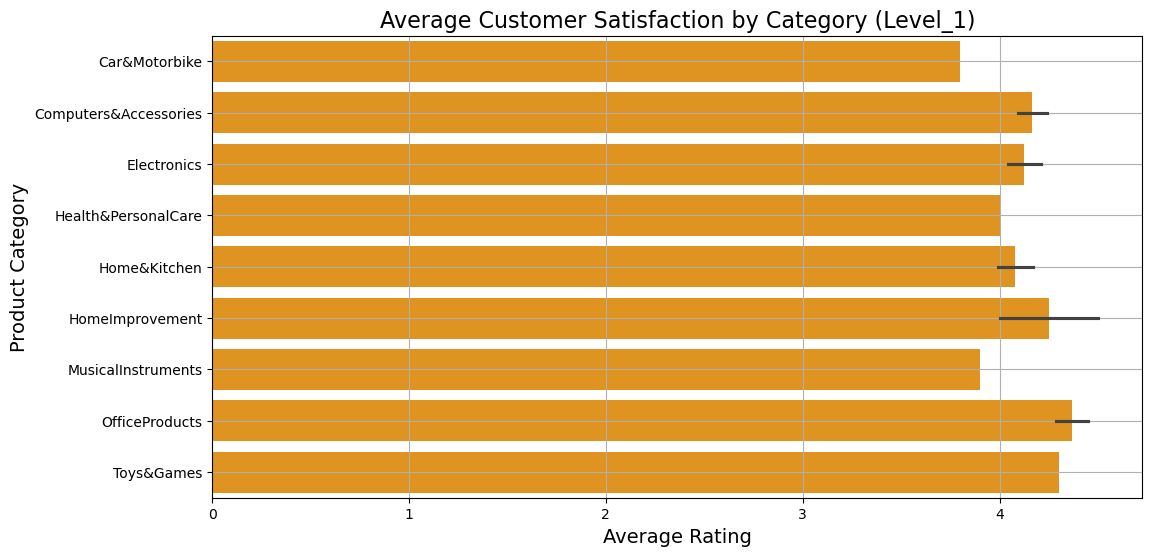

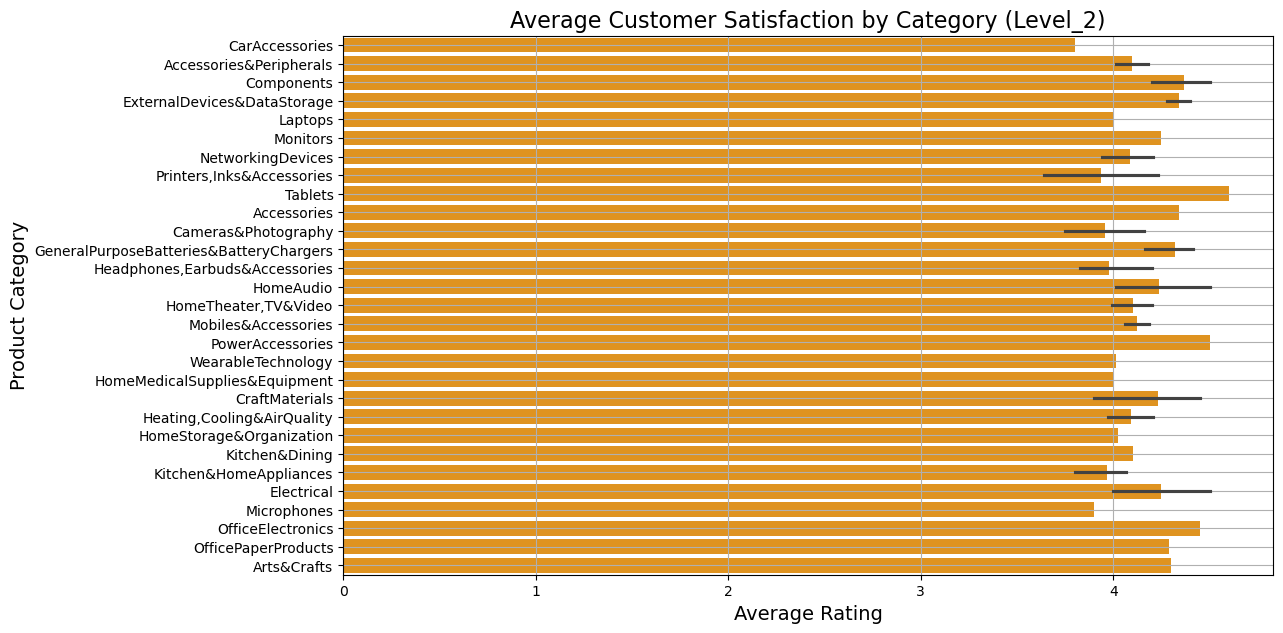

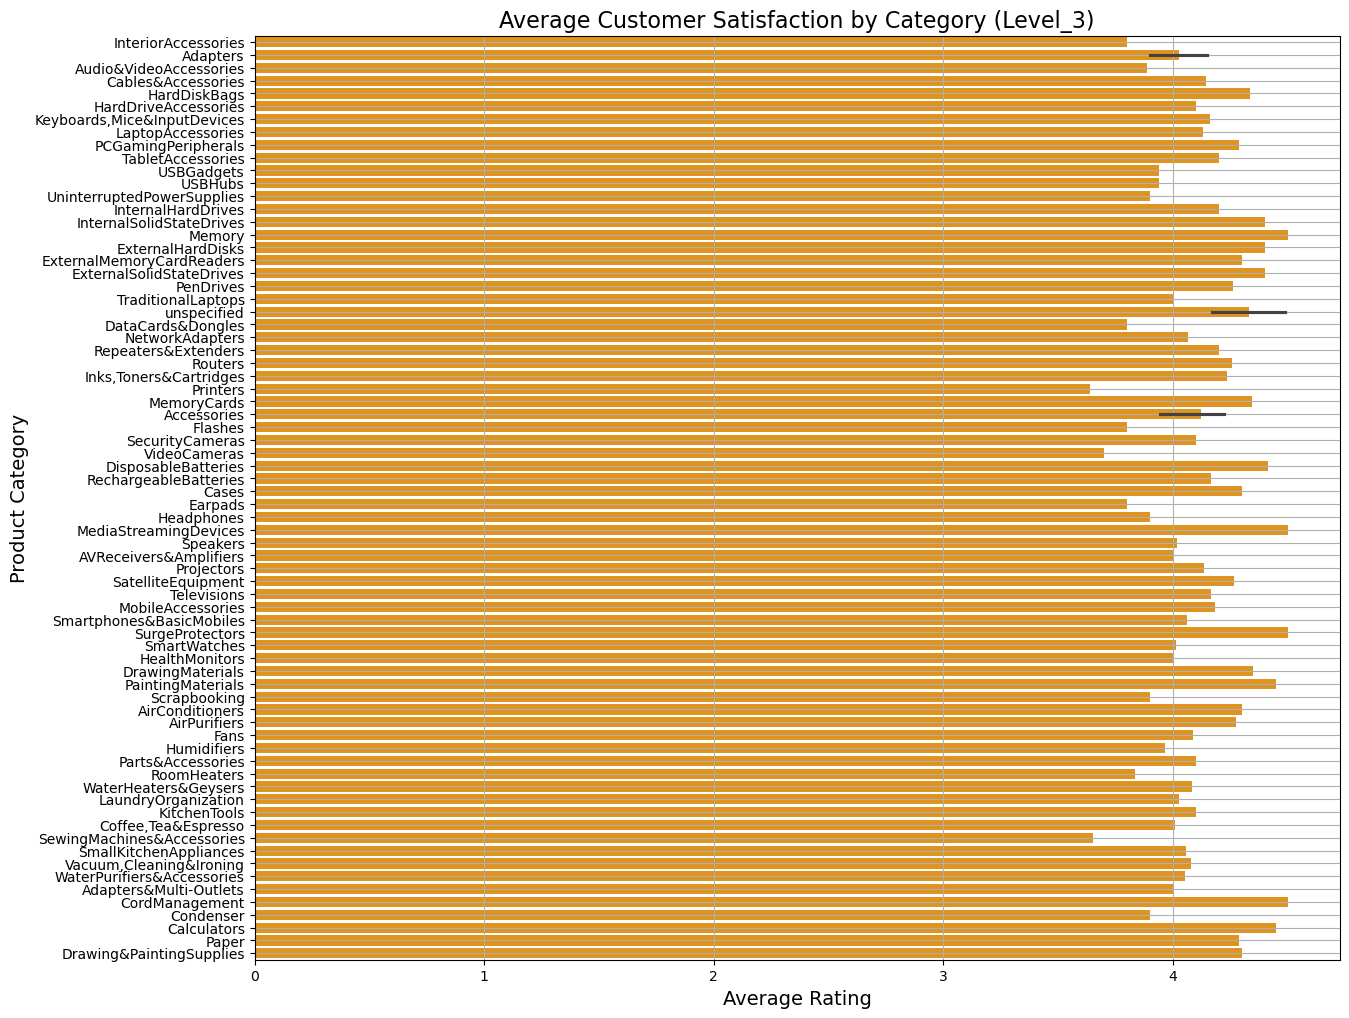

In [29]:
category_highest_rating = df.groupby(['Level_1','Level_2','Level_3']).agg({
    'rating': 'mean'
}).reset_index()
category_highest_rating.sort_values(by='rating',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=category_highest_rating,y='Level_1',x='rating',color=amazon_orange)
plt.title('Average Customer Satisfaction by Category (Level_1)', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(12,7))
sns.barplot(data=category_highest_rating,y='Level_2',x='rating',color=amazon_orange)
plt.title('Average Customer Satisfaction by Category (Level_2)', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(14,12))
sns.barplot(data=category_highest_rating,y='Level_3',x='rating',color=amazon_orange)
plt.title('Average Customer Satisfaction by Category (Level_3)', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(True)
plt.show()

1. Average Customer Satisfaction by Category (Level_1)

	•	High Satisfaction Categories:
	•	Office Products and Musical Instruments have the highest average ratings, indicating strong customer satisfaction in these broad categories. This suggests that products in these categories are meeting or exceeding customer expectations.
	•	Health & Personal Care and Home & Kitchen also show high levels of satisfaction, making them key areas of strength.
	•	Lower Satisfaction Categories:
	•	Car & Motorbike and Home Improvement have the lowest average ratings among the Level_1 categories. This could indicate issues with product quality, customer expectations, or both in these categories.
	•	Implications:
	•	Focus on High-Performing Categories: Continue to leverage strengths in categories like Office Products and Musical Instruments through marketing and product expansion.
	•	Investigate Lower-Performing Areas: Further analysis into why Car & Motorbike and Home Improvement are lagging could reveal areas for improvement, such as product quality, pricing, or customer support.

2. Average Customer Satisfaction by Category (Level_3)

	•	High Satisfaction Subcategories:
	•	Office Electronics, Office Paper Products, and Tablets are the top-performing subcategories, indicating very high customer satisfaction. These subcategories likely offer products that meet specific, well-defined customer needs.
	•	Accessories and Components also show strong performance, reflecting well on the variety and quality offered in these detailed product areas.
	•	Lower Satisfaction Subcategories:
	•	Car Accessories and Microphones have some of the lowest average ratings among Level_3 categories, which could signal potential issues related to product quality, functionality, or customer service in these niches.
	•	Networking Devices and Monitors are also on the lower end of the satisfaction spectrum, which may reflect challenges in technology or customer expectations.
	•	Implications:
	•	Targeted Improvements: For subcategories like Car Accessories and Microphones, it may be worth diving deeper into customer reviews to identify specific issues that can be addressed through product redesigns, better quality control, or improved customer support.
	•	Leverage Top Subcategories: High-performing subcategories like Office Electronics and Tablets can be highlighted in marketing campaigns, promotions, or even used as benchmarks for improving other product lines.

Business Recommendations:

	1.	Product Development and Quality Control:
	•	Invest in product development and quality control for lower-performing categories and subcategories, particularly Car & Motorbike, Home Improvement, and Car Accessories.
	•	Consider introducing new products or updating existing ones in high-satisfaction areas to capitalize on existing customer satisfaction.
	2.	Customer Feedback and Experience:
	•	Collect and analyze more detailed customer feedback in the lower-rated categories to understand the specific pain points.
	•	Improve customer experience in these areas, possibly through enhanced customer support, clearer product descriptions, or better post-purchase services.
	3.	Marketing and Promotions:
	•	Highlight and promote the top-performing categories and subcategories in marketing efforts to reinforce positive customer perceptions and drive sales in these areas.
	•	Use insights from high-performing categories to inform strategies in lower-performing ones, such as focusing on key features that customers value.
	4.	Cross-Category Strategy:
	•	Consider cross-selling strategies that pair high-satisfaction products with lower-rated ones to potentially boost the perceived value of lower-performing products.
	•	Explore whether customer satisfaction trends differ by demographic or region to tailor product offerings more precisely.

Conclusion:

This analysis provides a clear picture of where customer satisfaction is highest and where there may be issues to address. By focusing on both leveraging high-performing categories and improving lower-rated ones, the business can work towards increasing overall customer satisfaction and driving growth.

4. How Do Product Features (Extracted from Descriptions) Affect Sales and Ratings?

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(df['about_product'].fillna(''))

# LDA Topic Modeling
lda = LDA(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# You can further analyze the impact of these topics on ratings and sales

Topic 1:
['inch', '10', 'mini', 'charge', 'iphone', '12', 'charging', 'ipad', 'pro', 'water']
Topic 2:
['comes', 'water', 'easily', 'clean', 'quality', 'mouse', 'high', 'design', 'use', 'easy']
Topic 3:
['compatible', 'stand', 'data', 'speed', 'charging', 'devices', 'laptop', 'type', 'cable', 'usb']
Topic 4:
['water', 'stainless', 'motor', 'body', 'steel', 'year', 'product', 'watch', 'power', 'warranty']
Topic 5:
['warranty', 'hd', 'sound', 'camera', 'bluetooth', 'product', 'connect', 'display', 'remote', 'tv']


6. What is the Relationship Between Product Ratings and Sales Volume?

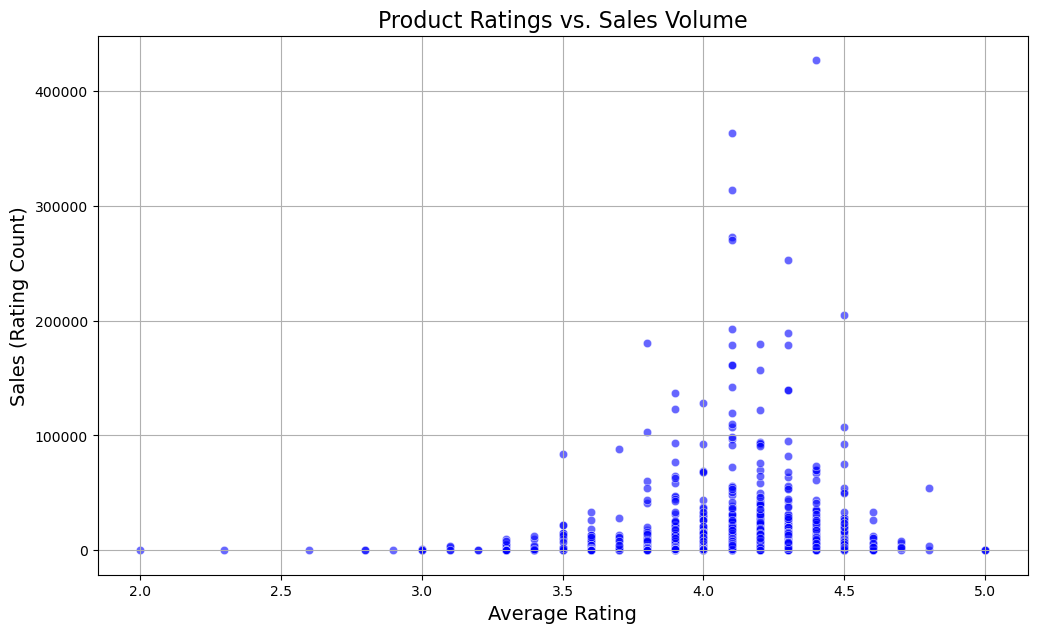

Spearman correlation between rating and sales volume: nan


In [31]:
# Scatter plot for rating vs. sales volume
plt.figure(figsize=(12, 7))
sns.scatterplot(x='rating', y='rating_count', data=df, color='blue', alpha=0.6)
plt.title('Product Ratings vs. Sales Volume', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Sales (Rating Count)', fontsize=14)
plt.grid(True)
plt.show()

# Correlation calculation
correlation, _ = spearmanr(df['rating'], df['rating_count'])
print(f'Spearman correlation between rating and sales volume: {correlation:.2f}')

Key Observations:

	1.	Cluster Around High Ratings:
	•	The majority of products cluster around the 3.5 to 4.5 average rating range. This suggests that most products receive fairly positive ratings, indicating general customer satisfaction across the board.
	2.	Sales Concentration:
	•	Higher sales volumes are primarily concentrated within the 4.0 to 4.5 rating range. Products with ratings in this range tend to have the highest sales volumes, with several products achieving exceptionally high sales.
	•	There are some outliers with very high sales even beyond this range, but these are less common.
	3.	Lower Ratings and Sales:
	•	Products with ratings below 3.5 generally have much lower sales volumes, indicating that lower-rated products are less popular or less likely to drive high sales. This trend suggests that customer satisfaction, as reflected in product ratings, plays a significant role in sales performance.
	4.	Limited Impact of Ratings Beyond a Threshold:
	•	There are relatively few products with ratings below 2.5 or above 4.5, and these extremes do not show a clear pattern in terms of sales. This indicates that while a moderate to high rating (around 4.0) is important, ratings beyond 4.5 do not necessarily lead to a proportional increase in sales.

Possible Interpretation:

	•	Quality-Driven Sales:
	•	The clustering of higher sales within the 4.0-4.5 rating range suggests that customers are more likely to purchase products that are perceived to have good quality. This aligns with the idea that customer reviews and ratings significantly influence purchasing decisions.
	•	Threshold Effect:
	•	There seems to be a threshold around the 4.0 rating mark, where products below this threshold experience diminishing returns in sales, while those above it are more likely to drive higher volumes. This could indicate that customers use a 4.0 rating as a benchmark for quality.
	•	Outliers:
	•	The few products with very high sales despite lower ratings could indicate niche markets or strong brand loyalty, where specific product features outweigh overall ratings.

Business Implications:

	1.	Focus on Maintaining High Ratings:
	•	Ensuring that products consistently achieve ratings around or above 4.0 should be a priority, as this rating level is associated with higher sales volumes. This can be achieved through continuous product quality improvements and by addressing customer feedback effectively.
	2.	Marketing Strategy:
	•	Highlight products that have ratings of 4.0 or higher in marketing campaigns, as these are more likely to attract customers and drive sales.
	•	For products with ratings below 3.5, consider investigating the causes of dissatisfaction and implementing targeted improvements or promotions to boost their appeal.
	3.	Product Development:
	•	Use customer feedback and reviews to identify and address the factors that contribute to lower ratings. Improving these aspects could help lift sales for underperforming products.
	4.	Customer Engagement:
	•	Engage customers who leave ratings around the 4.0 mark to understand what drives their satisfaction and to encourage them to provide detailed reviews, which can further help in refining product offerings.

Conclusion:

This analysis reinforces the importance of maintaining high product ratings to drive sales. The relationship between ratings and sales suggests that achieving and maintaining an average rating around 4.0 or higher can significantly impact sales performance. Products that fall below this threshold should be carefully reviewed and improved to avoid losing market share.


7. How Effective are Promotional Strategies in Driving Sales?

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_61790/2159342367.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_percentage', y='roi', data=promotion_roi, palette='viridis')


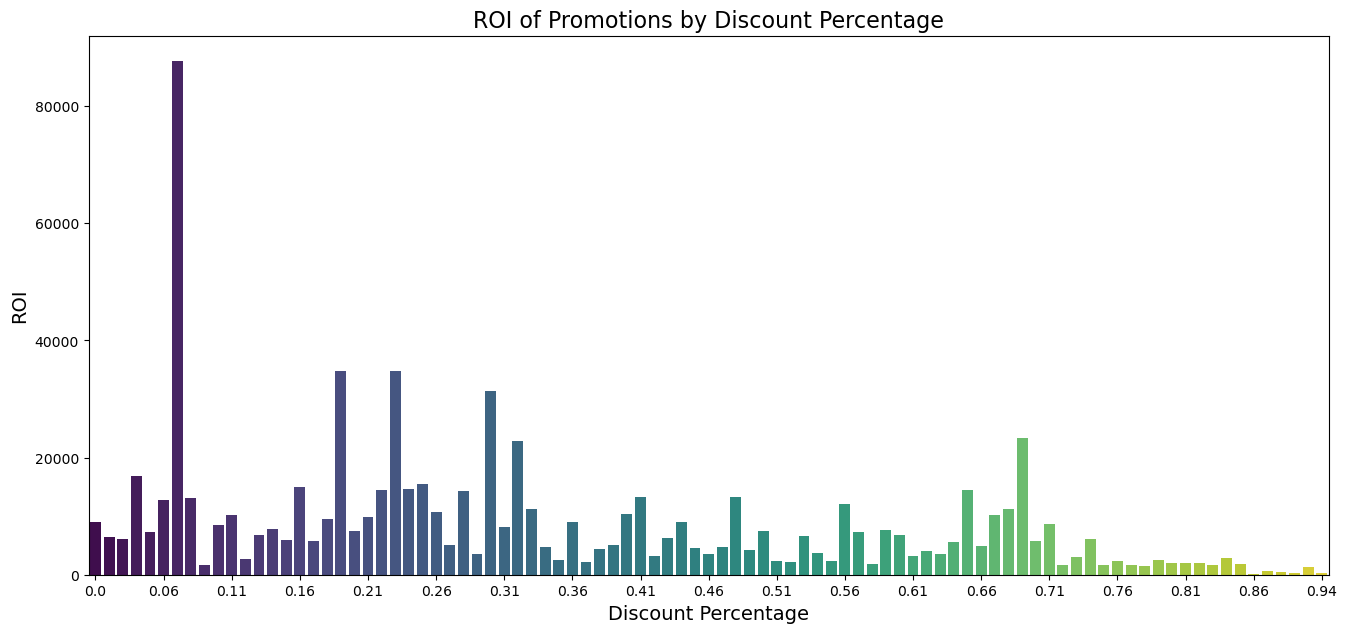

In [32]:
df['roi'] = (df['rating_count'] * df['discounted_price']) / df['actual_price'] 

# Group by discount percentage
promotion_roi = df.groupby('discount_percentage').agg({'roi': 'mean'}).reset_index()

# Plot ROI by discount percentage
plt.figure(figsize=(16,7))
sns.barplot(x='discount_percentage', y='roi', data=promotion_roi, palette='viridis')
plt.title('ROI of Promotions by Discount Percentage', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.xticks(np.arange(0, len(promotion_roi['discount_percentage']), step=5)) 
plt.ylabel('ROI', fontsize=14)
plt.show()

Key Observations:

	1.	High ROI at Specific Discount Levels:
	•	There is a significant spike in ROI around the 5% and 10% discount levels, with the highest ROI occurring at approximately 6%. This suggests that minimal discounts can generate substantial returns, likely because they are enough to incentivize purchases without drastically reducing profit margins.
	•	Other notable spikes occur around the 15-20% and 30-35% discount ranges, indicating additional “sweet spots” where discounts are effective in driving profitable sales.
	2.	Diminishing ROI Beyond Certain Discount Levels:
	•	As the discount percentage increases beyond 40%, the ROI generally diminishes. There are few exceptions, such as at approximately 66%, but overall, higher discounts tend to yield lower returns.
	•	Discounts above 70% show a sharp decline in ROI, indicating that excessive discounts may not be sustainable or profitable.
	3.	Scattered ROI Distribution:
	•	The ROI values are spread across various discount levels, but the general trend suggests that lower to moderate discounts (between 5% and 40%) are more effective in generating higher returns compared to deeper discounts.

Possible Interpretation:

	•	Optimal Discounting Strategy:
	•	The data indicates that lower to moderate discounts, particularly around 5-10% and 15-20%, provide the best ROI. These levels may strike the right balance between offering value to customers and maintaining profit margins.
	•	Risk of Over-Discounting:
	•	High discounts (above 50%) may attract more sales volume but do so at the expense of profitability. The steep decline in ROI at higher discount levels suggests that such promotions should be used cautiously and possibly limited to clear inventory or target highly price-sensitive customers.
	•	Targeted Promotions:
	•	The spikes at specific discount levels suggest that targeted promotions with these discount rates could be strategically deployed to maximize ROI during sales campaigns or special events.

Business Implications:

	1.	Strategic Discounting:
	•	Focus on offering discounts in the 5-20% range for regular promotions, as these have been shown to generate high ROI. Consider using higher discounts sparingly, only in situations where clearing inventory or achieving specific sales targets is necessary.
	2.	Profitability Analysis:
	•	For products or categories that consistently require deeper discounts to drive sales, reassess the pricing strategy, cost structure, or market positioning to ensure long-term profitability.
	3.	Promotion Planning:
	•	Use these insights to plan promotional campaigns that maximize ROI. For example, running a 5-10% discount promotion during high-traffic periods could yield significant returns without drastically cutting into profit margins.
	4.	Inventory Management:
	•	Apply deeper discounts strategically for inventory management purposes, ensuring that even when higher discounts are offered, they are aligned with the overall profitability goals of the business.

Conclusion:

The analysis highlights that not all discounts are equally effective in driving profitable sales. By focusing on the optimal discount ranges identified, businesses can enhance their promotional strategies to achieve better financial outcomes while still attracting customers. Caution should be exercised with high discount levels, as they often result in lower ROI.

8. How Do Product Categories Perform in Terms of Price Sensitivity?


                            OLS Regression Results                            
Dep. Variable:           rating_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7997
Date:                Sun, 25 Aug 2024   Prob (F-statistic):              0.450
Time:                        21:07:15   Log-Likelihood:                -14121.
No. Observations:                1194   AIC:                         2.825e+04
Df Residuals:                    1191   BIC:                         2.826e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.487e+04   1067.098  

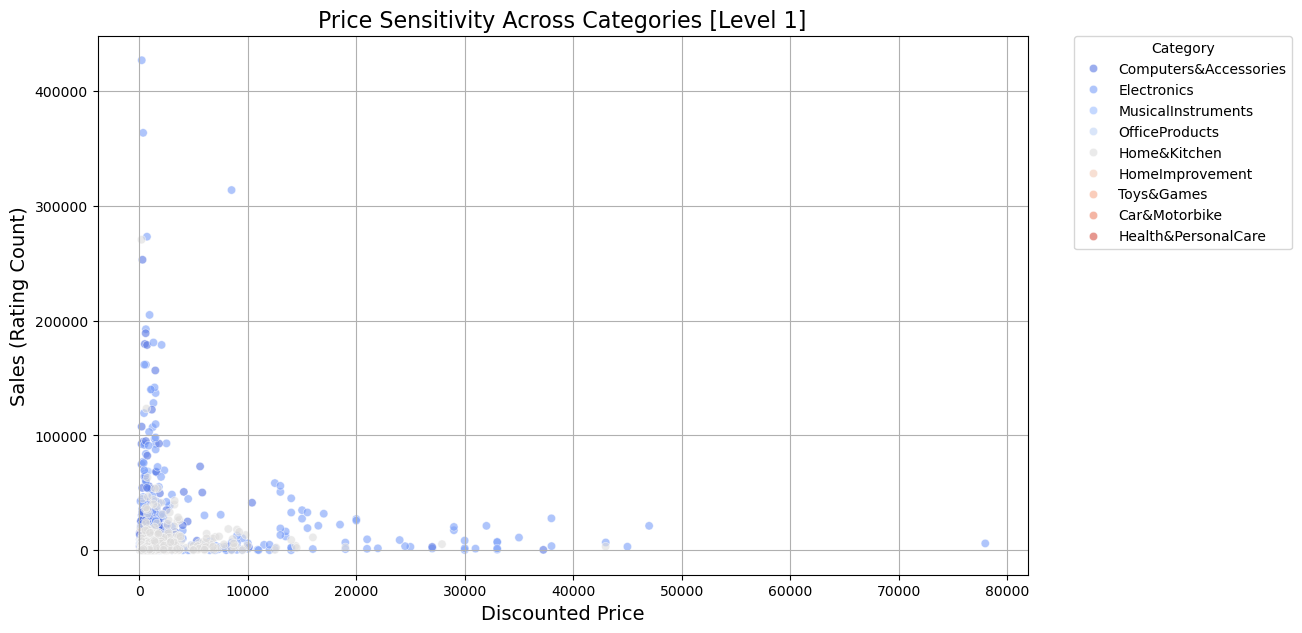

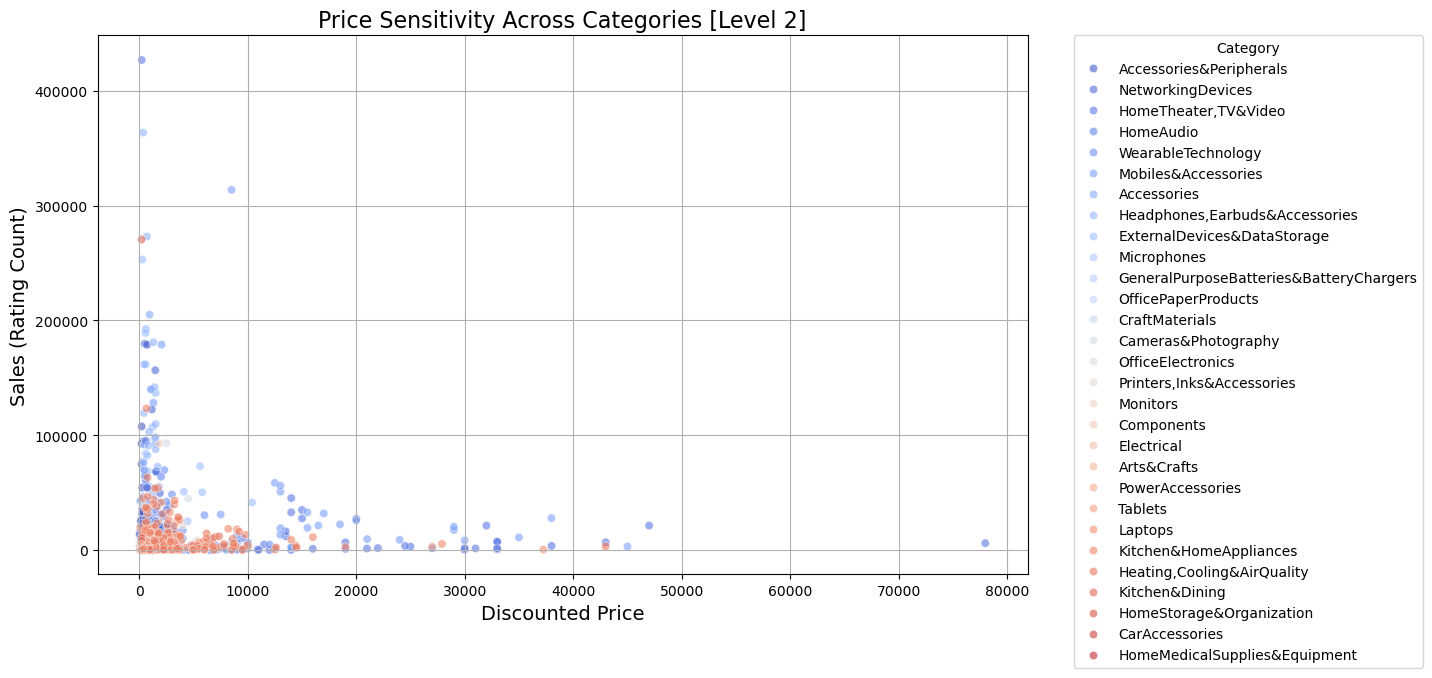

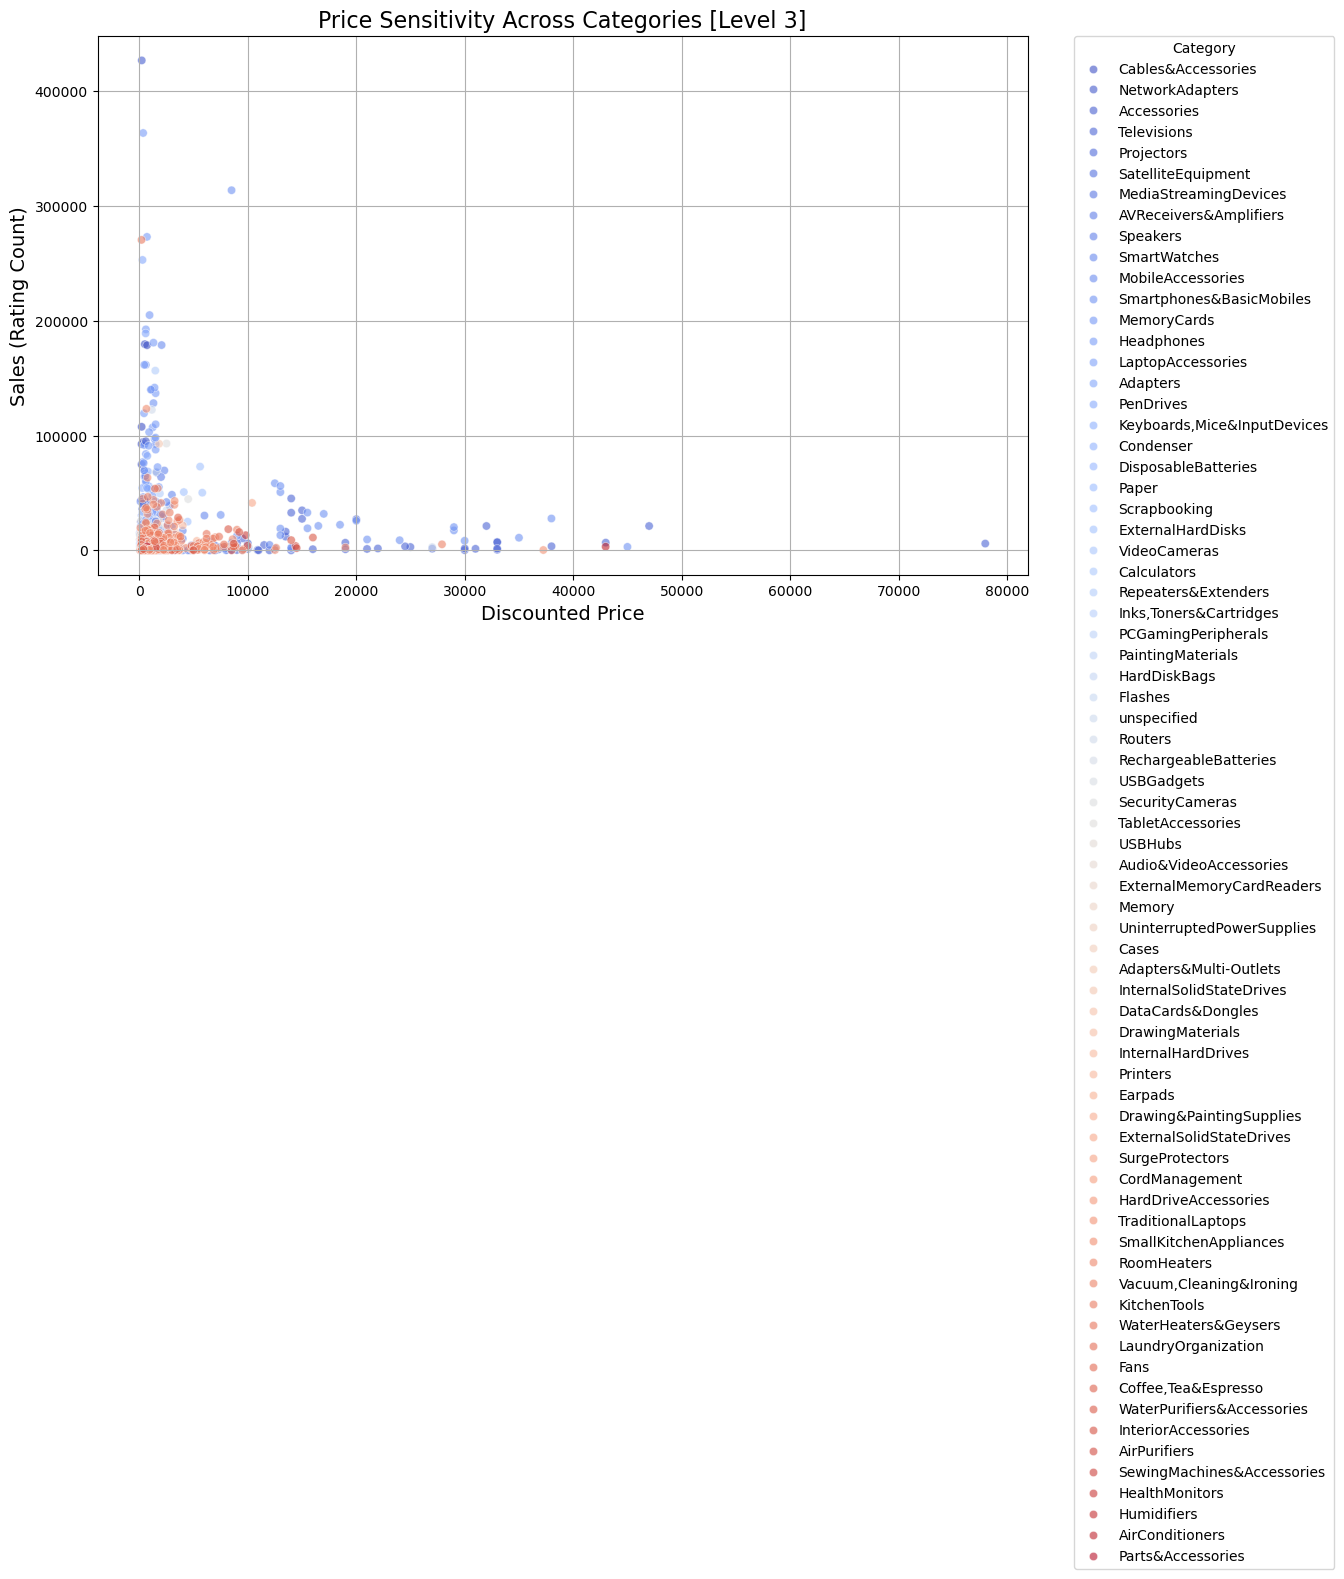

In [33]:
import statsmodels.api as sm

# Regression model to predict sales based on price
X = df[['actual_price', 'discounted_price']]
X = sm.add_constant(X)
y = df['rating_count']

model = sm.OLS(y, X).fit()
print(model.summary())

# Plot price sensitivity across categories
plt.figure(figsize=(12, 7))
sns.scatterplot(x='discounted_price', y='rating_count', hue='Level_1', data=df, palette='coolwarm', alpha=0.6)
plt.title('Price Sensitivity Across Categories [Level 1]', fontsize=16)
plt.xlabel('Discounted Price', fontsize=14)
plt.ylabel('Sales (Rating Count)', fontsize=14)
plt.grid(True)
plt.legend(title='Category',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(12, 7))
sns.scatterplot(x='discounted_price', y='rating_count', hue='Level_2', data=df, palette='coolwarm', alpha=0.6)
plt.title('Price Sensitivity Across Categories [Level 2]', fontsize=16)
plt.xlabel('Discounted Price', fontsize=14)
plt.ylabel('Sales (Rating Count)', fontsize=14)
plt.grid(True)
plt.legend(title='Category',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(12, 7))
sns.scatterplot(x='discounted_price', y='rating_count', hue='Level_3', data=df, palette='coolwarm', alpha=0.6)
plt.title('Price Sensitivity Across Categories [Level 3]', fontsize=16)
plt.xlabel('Discounted Price', fontsize=14)
plt.ylabel('Sales (Rating Count)', fontsize=14)
plt.grid(True)
plt.legend(title='Category',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


1. Price Sensitivity Across Categories (Level 1)

	•	Sales Concentration at Lower Price Points:
	•	Most sales are concentrated at lower discounted price points, generally below 10,000 units of currency. This trend is consistent across all categories, indicating that lower-priced products tend to sell in higher volumes.
	•	Computers & Accessories and Electronics categories show some of the highest sales volumes at these lower price points, suggesting strong demand for affordable tech products.
	•	Diminished Sales at Higher Prices:
	•	As discounted prices increase beyond 10,000, the number of sales drops sharply across all categories. This trend suggests that higher-priced products are less price-sensitive, meaning consumers may be more selective or price-conscious at these higher price points.
	•	Category Specificity:
	•	Categories such as Home & Kitchen and Office Products also show significant sales, but generally at lower price points. These products may have a broader appeal or meet essential needs, driving sales despite their lower price sensitivity.

2. Price Sensitivity Across Categories (Level 2)

	•	Detailed Subcategory Analysis:
	•	The scatter plot at Level 2 reveals more granular insights into specific subcategories. For instance, subcategories like Accessories & Peripherals and Headphones, Earbuds & Accessories exhibit high sales at lower price points, reinforcing the trend seen at Level 1.
	•	Subcategories related to technology (e.g., Networking Devices, Laptops) show a wider range of price points, but sales are still concentrated at the lower end, indicating that even within tech, affordability drives volume.
	•	Price Insensitivity at Higher Price Points:
	•	Higher-priced subcategories, such as Home Theater, TV & Video, have fewer data points at higher prices, suggesting that these products might appeal to a niche market that is less sensitive to price or that such products are simply less frequently purchased.

3. Price Sensitivity Across Categories (Level 3)

	•	Highly Specific Product Types:
	•	At Level 3, the scatter plot reveals the price sensitivity of very specific product types. For instance, Cables & Accessories and Memory Cards show very high sales at lower price points, indicating that these are highly price-sensitive items.
	•	Laptops and Smartphones show sales across a broader range of prices but still follow the general trend of higher sales at lower prices.
	•	Low Sales at Premium Price Points:
	•	Products with higher discounted prices, such as Traditional Laptops and Televisions, show significantly lower sales, reinforcing the trend that high-price items sell less frequently.

Business Implications:

	1.	Focus on Affordable Product Lines:
	•	Given that most sales occur at lower price points, consider focusing on product lines that can be offered at affordable prices. This strategy is especially relevant for categories like Computers & Accessories, Electronics, and Home & Kitchen.
	2.	Targeted Discounts:
	•	For higher-priced items, consider targeted discount strategies that make these products more accessible without significantly eroding profit margins. Special promotions or bundles might help boost sales in these categories.
	3.	Differentiation in Premium Segments:
	•	For products in the premium price range, differentiation through quality, brand reputation, and added value (e.g., warranties, exclusive features) may help drive sales despite the lower volume.
	4.	Category-Specific Strategies:
	•	Different categories and subcategories show varying levels of price sensitivity. Tailoring pricing strategies to the specific characteristics of each category can optimize sales and profitability.
	5.	Inventory and Marketing Strategies:
	•	Inventory management should consider the high turnover rate of lower-priced items, ensuring that these products are always in stock. Marketing efforts should highlight the affordability and value of these high-demand products.

Conclusion:

This analysis shows a clear trend of higher sales volumes at lower price points across most categories, indicating strong price sensitivity among consumers. Strategic pricing, particularly for higher-priced items, will be crucial in balancing sales volume with profitability. Tailored approaches for different categories will maximize the effectiveness of promotions and pricing strategies.


What is the Impact of User Reviews on Product Success?

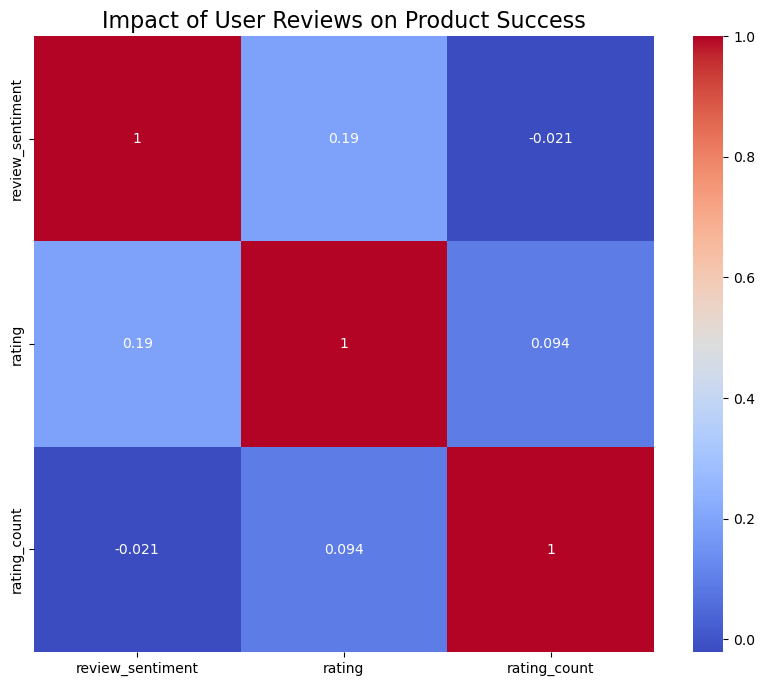

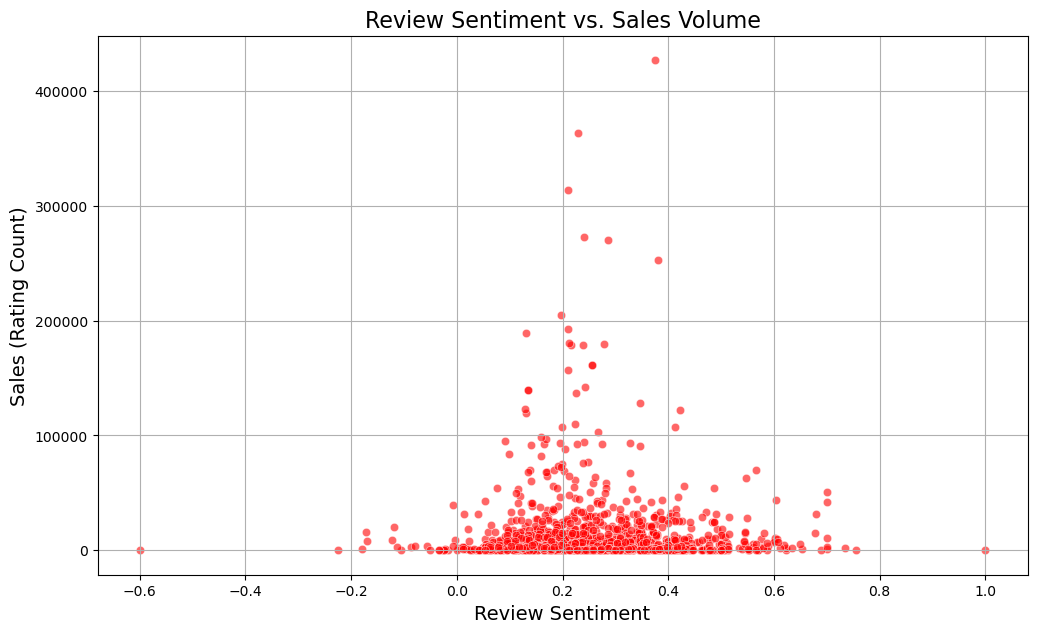

In [34]:
# Sentiment analysis on review content
df['review_sentiment'] = df['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Correlation analysis
correlation_matrix = df[['review_sentiment', 'rating', 'rating_count']].corr()

# heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Impact of User Reviews on Product Success', fontsize=16)
plt.show()

# Scatter plot for review sentiment vs. sales
plt.figure(figsize=(12, 7))
sns.scatterplot(x='review_sentiment', y='rating_count', data=df, color='red', alpha=0.6)
plt.title('Review Sentiment vs. Sales Volume', fontsize=16)
plt.xlabel('Review Sentiment', fontsize=14)
plt.ylabel('Sales (Rating Count)', fontsize=14)
plt.grid(True)
plt.show()

Correlation Heatmap Analysis

	1.	Review Sentiment vs. Rating:
	•	There is a positive correlation (0.19) between review sentiment and product ratings. This suggests that as the sentiment of reviews becomes more positive, the average product rating tends to increase, although the relationship is relatively weak.
	2.	Review Sentiment vs. Rating Count (Sales Volume):
	•	The correlation between review sentiment and rating count is slightly negative (-0.021), indicating that the sentiment of reviews does not have a strong direct relationship with the number of sales. This suggests that even products with neutral or slightly negative reviews can still generate significant sales, possibly due to factors like brand loyalty or product features.
	3.	Rating vs. Rating Count:
	•	There is a small positive correlation (0.094) between product ratings and rating count, indicating that higher-rated products tend to have slightly higher sales volumes. However, this correlation is weak, suggesting that other factors (such as price, brand, or promotion) may play a more significant role in driving sales.

Scatter Plot Analysis: Review Sentiment vs. Sales Volume

	1.	Cluster Around Neutral Sentiment:
	•	The majority of sales are concentrated around products with neutral to slightly positive review sentiments (around 0.0 to 0.4). This suggests that extreme sentiments (either highly negative or highly positive) are less common, and moderate reviews dominate the landscape.
	2.	High Sales with Moderate Sentiment:
	•	Products with the highest sales volumes often have review sentiments around 0.2 to 0.4, indicating that a moderately positive sentiment is sufficient to drive significant sales. This could imply that consumers are more influenced by a balanced perspective than by overwhelmingly positive or negative reviews.
	3.	Low Sales with Negative Sentiment:
	•	Products with negative sentiments (below 0.0) tend to have much lower sales volumes, which is expected. This trend suggests that negative reviews can deter potential buyers, reducing overall sales.

Business Implications:

	1.	Importance of Managing Customer Reviews:
	•	Given the positive correlation between review sentiment and product ratings, it’s essential to manage customer reviews effectively. Encouraging satisfied customers to leave positive reviews can help improve the product’s overall rating, which may lead to slightly higher sales.
	2.	Balanced Review Sentiment:
	•	The concentration of high sales around neutral to slightly positive review sentiments suggests that consumers value balanced and authentic reviews. Brands should focus on maintaining a realistic portrayal of their products in reviews, as overly positive reviews might be perceived as inauthentic.
	3.	Addressing Negative Reviews:
	•	Since negative reviews are associated with lower sales volumes, addressing the concerns raised in these reviews is crucial. Providing responsive customer support and resolving issues quickly can help mitigate the impact of negative reviews.
	4.	Leveraging Reviews in Marketing:
	•	Highlighting positive reviews in marketing materials, especially those that provide a balanced view, can build trust with potential buyers and encourage purchases. Consumers often rely on reviews as a key decision-making factor, so showcasing authentic, positive feedback can be a powerful tool.

Conclusion:

This analysis underscores the significant but nuanced role that user reviews play in product success. While positive sentiment in reviews correlates with higher ratings, the relationship with sales is more complex, with many factors at play. Managing reviews effectively and addressing negative feedback can help improve both product ratings and sales performance.


 How Do High-Value Products Compare Across Categories?

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_61790/2488281054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='rating', x='Level_1', data=high_value_summary, palette='magma')


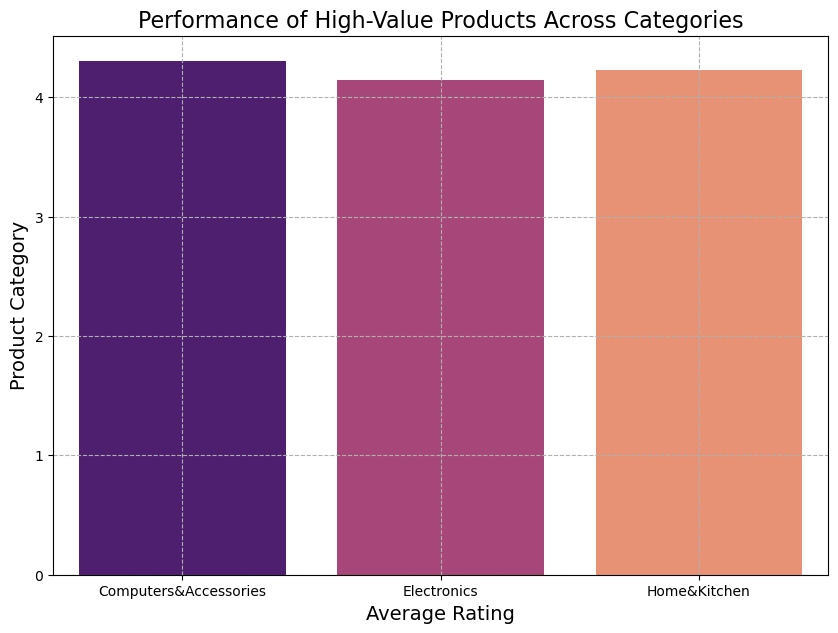

In [35]:
# Filter for high-value products
high_value_products = df[df['actual_price'] > df['actual_price'].quantile(0.9)]  # Top 10% by price

# Compare sales and ratings across categories
high_value_summary = high_value_products.groupby('Level_1').agg({
    'rating_count': 'sum',
    'rating': 'mean'
}).reset_index()

# Plot high-value products performance
plt.figure(figsize=(10, 7))
sns.barplot(y='rating', x='Level_1', data=high_value_summary, palette='magma')
plt.title('Performance of High-Value Products Across Categories', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(True,linestyle='--')
plt.show()

Key Observations:

	1.	Consistently High Ratings Across Categories:
	•	All three categories—Computers & Accessories, Electronics, and Home & Kitchen—show average ratings above 4.0, indicating that high-value products in these categories are generally well-received by customers. This suggests a high level of customer satisfaction for premium products across these segments.
	2.	Slight Variation in Ratings:
	•	The Home & Kitchen category appears to have the highest average rating, slightly edging out Electronics and Computers & Accessories. This could indicate that high-value products in the Home & Kitchen segment might meet or exceed customer expectations more consistently than those in the other two categories.
	3.	Customer Trust in High-Value Products:
	•	The high ratings across all categories suggest that customers trust the quality and value of premium products, which is crucial for maintaining brand loyalty and encouraging repeat purchases.

Business Implications:

	1.	Focus on High-Value Segments:
	•	Given the high average ratings, it is clear that customers appreciate high-value products across these categories. The business should continue to focus on maintaining the quality and performance of these products to sustain high levels of customer satisfaction.
	2.	Leverage Positive Customer Feedback:
	•	The consistently high ratings can be leveraged in marketing strategies. Highlighting customer satisfaction with high-value products can attract more buyers who are looking for quality and reliability, especially in the competitive segments of Electronics and Home & Kitchen.
	3.	Product Development and Enhancement:
	•	While the ratings are high, there’s always room for improvement. Gathering detailed customer feedback can help identify specific areas where these products excel and where there is potential for enhancement, ensuring that the business continues to meet or exceed customer expectations.
	4.	Strategic Pricing and Promotions:
	•	Given the positive reception of high-value products, the business might explore strategic pricing that reflects the premium quality while still appealing to a broad customer base. Promotions that highlight the superior ratings of these products can also be effective in driving sales.

Conclusion:

This analysis shows that high-value products across Computers & Accessories, Electronics, and Home & Kitchen categories are well-regarded by customers, as reflected in their strong average ratings. Maintaining the quality and performance of these products is key to sustaining customer satisfaction and driving continued success in these segments.